https://www.kaggle.com/kimjihoo/coronavirusdataset   
https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description   
seaborn :   
https://www.youtube.com/watch?v=gWhwAY5Q9Ec   
   
참고자료:
https://www.kaggle.com/eamartey/covid-19-policy-analysis-visualization   
https://www.kaggle.com/eamartey/time-and-weather-analysis-of-the-province?select=Time.csv   
https://www.kaggle.com/eamartey/time-and-weather-analysis-of-the-province   
https://dacon.io/competitions/official/235590/codeshare/997

# @코로나 바이러스를 분석해보자

In [181]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [163]:
patient_info = os.getenv('HOME')+'/kaggle/covid19/PatientInfo.csv'
patient_info = pd.read_csv(patient_info)
case = os.getenv('HOME')+'/kaggle/covid19/Case.csv'
case = pd.read_csv(case)
policy = os.getenv('HOME')+'/kaggle/covid19/Policy.csv'
policy = pd.read_csv(policy)
time = os.getenv('HOME')+'/kaggle/covid19/Time.csv'
time = pd.read_csv(time)
time_prov = os.getenv('HOME')+'/kaggle/covid19/TimeProvince.csv'
time_prov = pd.read_csv(time_prov)



### 먼저, 2020년 1월 20일부터 6월 30일까지의 일별 확진자를 확인해보자.

In [6]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [106]:
time['date'] = pd.to_datetime(time['date'])

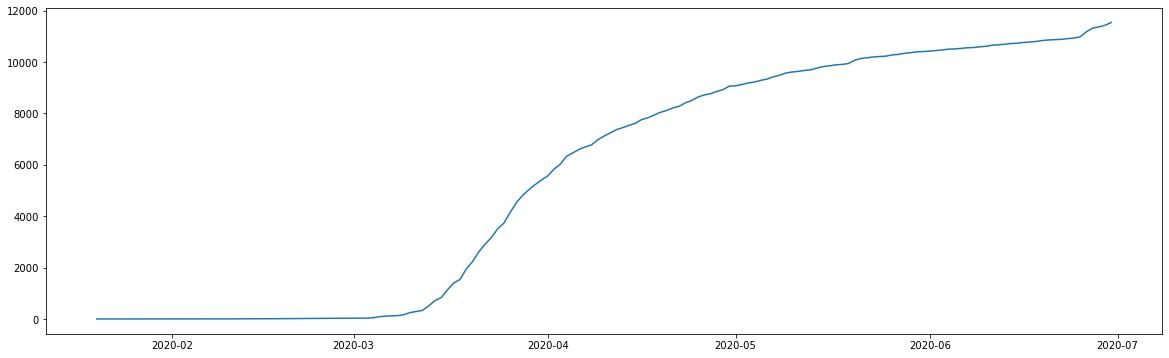

In [27]:
plt.figure(figsize=(20, 6))
plt.plot(time['date'], time['released'])

누적값이 아니라 일별 확진자는?

In [103]:
days = []
day = []
confirmed = []

for i in time['confirmed']:
    days.append(i)
    
for ii in range(162):
    day.append(days[ii] - days[ii+1])

for iii in range(162):
    confirmed.append(day[iii]*-1)

confirmed[-5:]

[39, 51, 62, 42, 43]

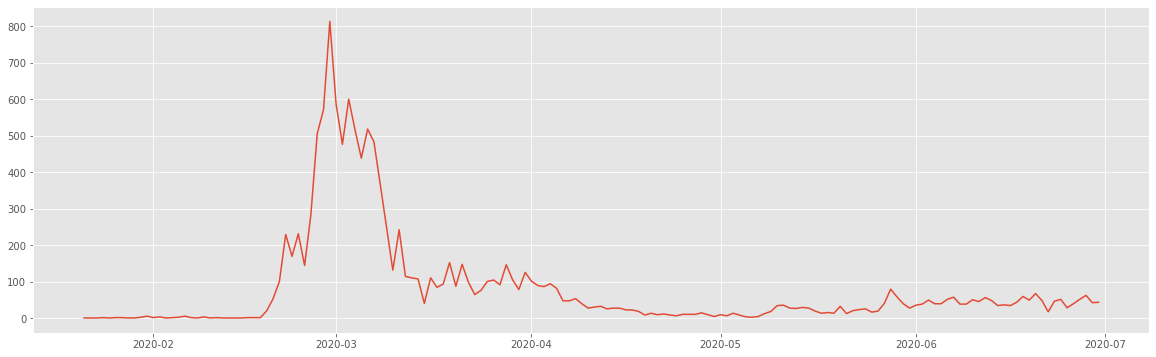

In [76]:
plt.figure(figsize=(20, 6))
plt.style.use('ggplot')
plt.plot(time['date'][1:], confirmed)

### 확진자, 완치자, 사망자 비교

In [147]:
def corona(x):
    
    days = []
    day = []

    for i in time[x]:
        days.append(i)
        
    for ii in range(162):
        day.append((days[ii] - days[ii+1])*-1)
    

#     for iii in range(162):
#         x.append(day[iii]*-1)

#     return day

In [145]:
corona('confirmed')
corona('released')
corona('confirmed')


print(confirmed[-5:])

confirmed
released
confirmed
[39, 51, 62, 42, 43]


In [100]:
# days = []
# day = []
# released = []

# for i in time['released']:
#     days.append(i)
        
# for ii in range(162):
#     day.append(days[ii] - days[ii+1])
        
# for iii in range(162):
#     released.append(day[iii]*-1)

In [101]:
# days = []
# day = []
# deceased = []

# for i in time['deceased']:
#     days.append(i)
        
# for ii in range(162):
#     day.append(days[ii] - days[ii+1])
        
# for iii in range(162):
#     deceased.append(day[iii]*-1)

In [149]:
days = []
day = []
test = []

for i in time['test']:
    days.append(i)
        
for ii in range(162):
    day.append(days[ii] - days[ii+1])
        
for iii in range(162):
    test.append(day[iii]*-1)

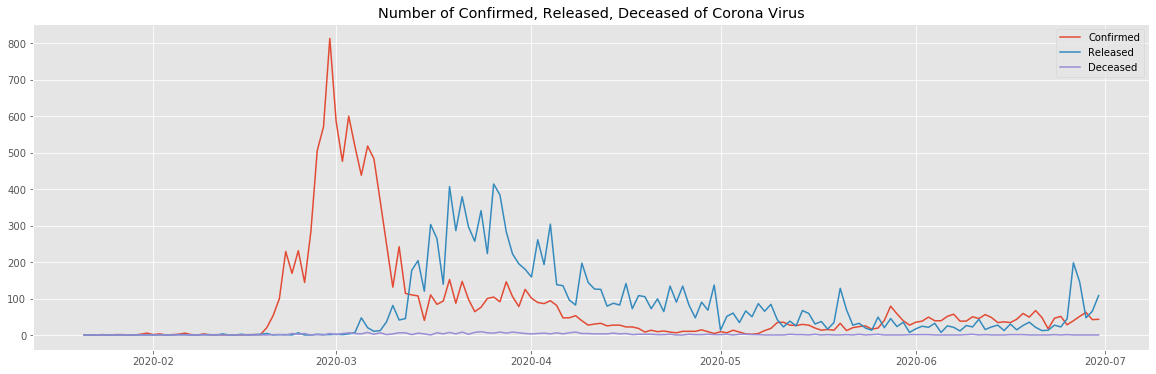

In [148]:
plt.figure(figsize=(20, 6))
plt.style.use('ggplot')
plt.title('Number of Confirmed, Released, Deceased of Corona Virus')
plt.plot(time['date'][1:], confirmed, label = 'Confirmed')
plt.plot(time['date'][1:], released, label = 'Released')
plt.plot(time['date'][1:], deceased, label = 'Deceased')
plt.legend()
plt.show()

### test 수를 더해봄

In [142]:
corona('test')

[0,
 3,
 18,
 5,
 0,
 24,
 10,
 55,
 71,
 59,
 66,
 59,
 58,
 61,
 117,
 107,
 171,
 467,
 745,
 501,
 512,
 1215,
 1299,
 887,
 731,
 492,
 427,
 557,
 1054,
 1401,
 2029,
 3198,
 5186,
 4593,
 6577,
 7548,
 13249,
 13099,
 14515,
 12888,
 4866,
 10670,
 16260,
 10856,
 9834,
 18199,
 13449,
 10329,
 8100,
 13526,
 12251,
 12603,
 13649,
 12688,
 6877,
 6292,
 12212,
 8931,
 11377,
 9640,
 10845,
 4271,
 6256,
 10546,
 9314,
 7046,
 12019,
 10964,
 6216,
 1053,
 15370,
 10983,
 10196,
 11530,
 11759,
 6201,
 5571,
 10500,
 8699,
 8708,
 8340,
 7428,
 4142,
 4122,
 8695,
 7114,
 4223,
 7688,
 8371,
 4275,
 3926,
 7979,
 6945,
 6012,
 5549,
 5641,
 3124,
 3375,
 6854,
 5683,
 5684,
 3188,
 4493,
 3411,
 2948,
 6316,
 2858,
 6293,
 5475,
 5167,
 3856,
 4606,
 12398,
 15030,
 15564,
 15263,
 13898,
 7008,
 5558,
 12363,
 10859,
 12251,
 13734,
 12002,
 5869,
 6148,
 13038,
 13401,
 15790,
 16454,
 17781,
 7921,
 10569,
 18460,
 17001,
 17006,
 17102,
 14345,
 7464,
 5445,
 17783,
 15975,


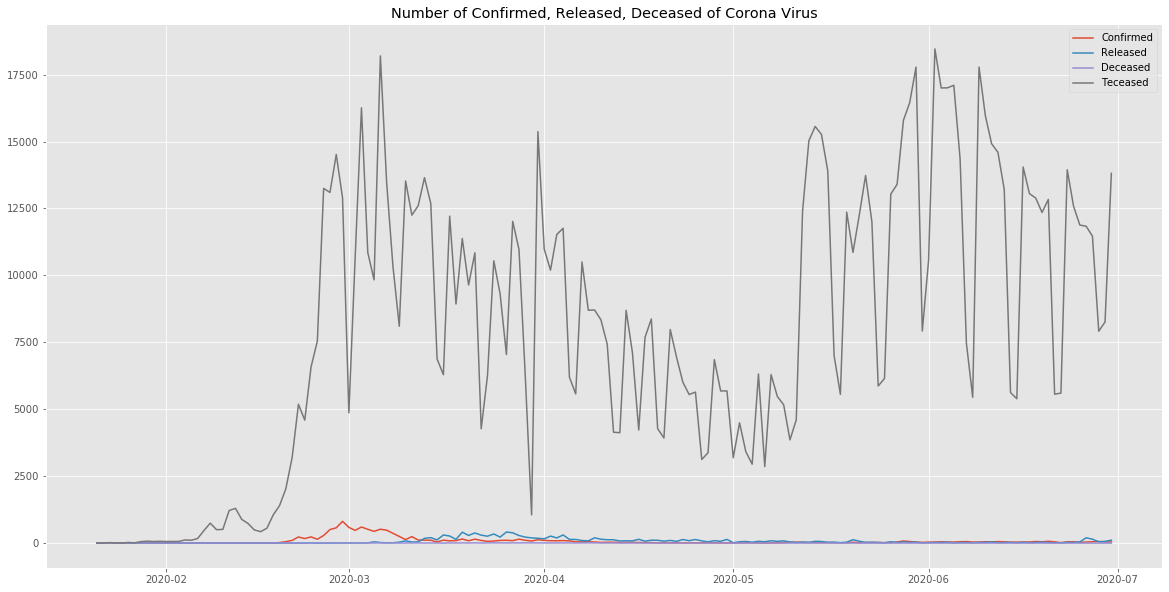

In [152]:
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
plt.title('Number of Confirmed, Released, Deceased of Corona Virus')
plt.plot(time['date'][1:], confirmed, label = 'Confirmed')
plt.plot(time['date'][1:], released, label = 'Released')
plt.plot(time['date'][1:], deceased, label = 'Deceased')
plt.plot(time['date'][1:], test, label = 'Teceased')
plt.legend()
plt.show()

test 수가 상대적으로 너무 많아서 plot으로 비교하기는 힘듦

## 시도별 확진자 현황

In [170]:
time_prov

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,Jeollabuk-do,27,21,0
2767,2020-06-30,0,Jeollanam-do,24,19,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0


/home/aiffel-dj58/anaconda3/envs/scratch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


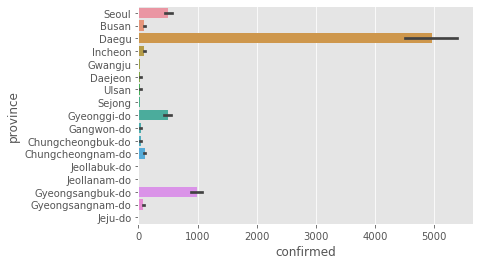

In [175]:
sns.barplot('confirmed', 'province', data=time_prov)

/home/aiffel-dj58/anaconda3/envs/scratch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


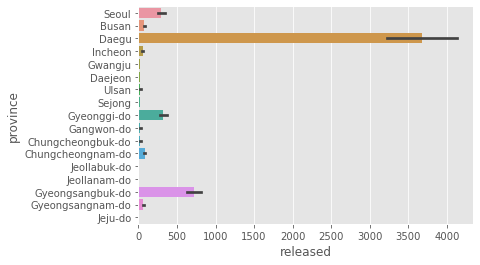

In [176]:
sns.barplot('released','province',  data = time_prov) 

/home/aiffel-dj58/anaconda3/envs/scratch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


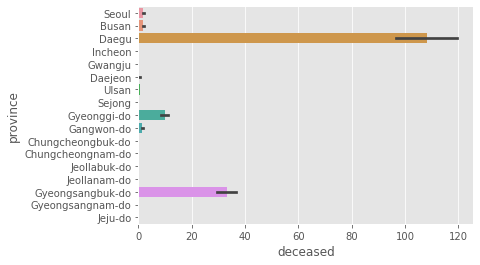

In [177]:
sns.barplot('deceased','province', data = time_prov)

## policy

In [178]:
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [182]:
policy.start_date = pd.to_datetime(policy.start_date)
policy.end_date = pd.to_datetime(policy.end_date)

policy['duration'] = (policy['end_date'] - policy['start_date'])

policy['duration'] = policy['duration']/np.timedelta64(1, 'D') #????

In [185]:
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date,duration
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19,16.0
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27,7.0
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22,25.0
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaT,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaT,NaN
...,...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11,13.0
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaT,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaT,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaT,NaN


/home/aiffel-dj58/anaconda3/envs/scratch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


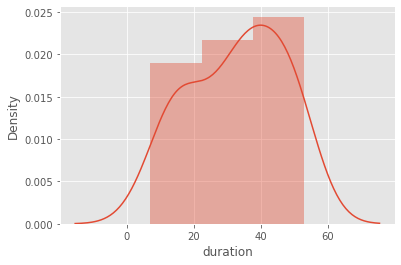

In [183]:
sns.distplot(policy.duration)

보통 10일 이상, 50일 미만으로 각 단계를 실행했음을 알수 있다.

/home/aiffel-dj58/anaconda3/envs/scratch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


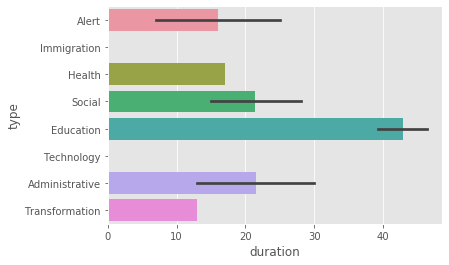

In [186]:
sns.barplot( 'duration', 'type',data = policy)

Education은 학교에 갈수 있는지 없는지에 대한 정보라 예측된다.   
학교에 갈수 없게 정책을 펼친 기간이 가장 높았고, 그 다음으로는 Social과 Administrative가 많은데 둘다 사회적인 정책을 말하는것? 같다.   
Immigration에 대한 정보를 확인할 수 없어 아쉽다.

/home/aiffel-dj58/anaconda3/envs/scratch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


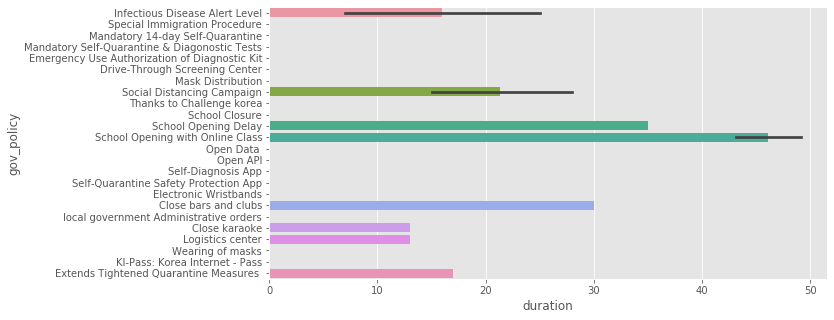

In [189]:
plt.figure(figsize = (10,5))
sns.barplot( 'duration', 'gov_policy',data = policy)

앞선 그래프에서 나왔던 education이 gov_policy 열에서 설명이 되는것 같다. Social Distancing Campaign은 사회적 거리두기를 시행한 기간을 말하고, Close bars and clubs가 앞선 그래프의 Administrative를 의미하는것 같다.

### 1, 2, 3, 4단계별 확진자 변화

In [57]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


1단계: 1/3 - 1/19   
2단계: 1/20 - 127   
3단계: 1/28 - 2/22   
4단계: 2/23 -

해당하는 일자의 확진자 수를 가지고 와야함 --> time의 date 컬럼

In [24]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


1/20 ~ 6/30 데이터밖에 없음. 1단계 추이는 확인 불가능

### 그럼, test 수별 negative와 confirmed의 관계는?   
당연히 상관관계는 있겠지만 유의미하다고 볼 수 있을까

In [ ]:
px.bar(age_dist, title='Age distribution')

In [62]:
px.bar(ifc_k)

NameError: name 'px' is not defined

In [149]:
ifc.value_counts().keys()

Index(['contact with patient', 'overseas inflow', 'etc', 'Itaewon Clubs',
       'Richway', 'Guro-gu Call Center', 'Shincheonji Church',
       'Coupang Logistics Center', 'Yangcheon Table Tennis Club',
       'Day Care Center', 'SMR Newly Planted Churches Group', 'Onchun Church',
       'Bonghwa Pureun Nursing Home', 'gym facility in Cheonan',
       'Ministry of Oceans and Fisheries', 'Wangsung Church',
       'Cheongdo Daenam Hospital', 'Dongan Church',
       'Eunpyeong St. Mary's Hospital', 'Gyeongsan Seorin Nursing Home',
       'Dunsan Electronics Town', 'KB Life Insurance', 'Seongdong-gu APT',
       'Gyeongsan Jeil Silver Town', 'Milal Shelter',
       'Gyeongsan Cham Joeun Community Center', 'Samsung Medical Center',
       'Orange Town', 'Korea Campus Crusade of Christ',
       'Geumcheon-gu rice milling machine manufacture', 'Geochang Church',
       'Gangnam Yeoksam-dong gathering', 'Seocho Family', 'Yeonana News Class',
       'Guri Collective Infection', 'Changnyeong Coi

In [130]:
type(ifc_k)

pandas.core.series.Series

ValueError: `bins` must increase monotonically, when an array

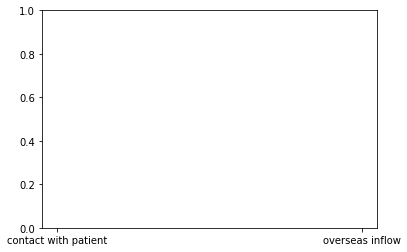

In [153]:
plt.hist(ifc.value_counts().keys(), ifc_k)
plt.imshow()

### 시간흐름에 따른 확진자 추이

In [4]:
time = os.getenv('HOME')+'/kaggle/covid19/Time.csv'
time = pd.read_csv(time)

In [17]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [22]:
time.tail()

,date,time,test,negative,confirmed,released,deceased
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282
162,2020-06-30,0,1273766,1240157,12800,11537,282


<Figure size 1440x432 with 0 Axes>

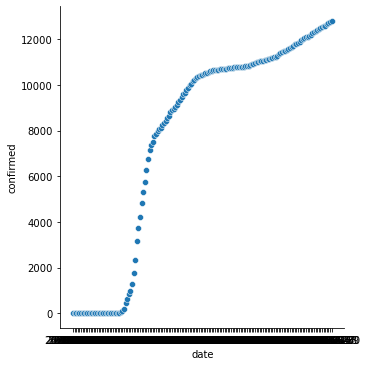

In [33]:
plt.figure(figsize=(20, 6))
sns.relplot(x=time['date'], y=time['confirmed'], data=time)

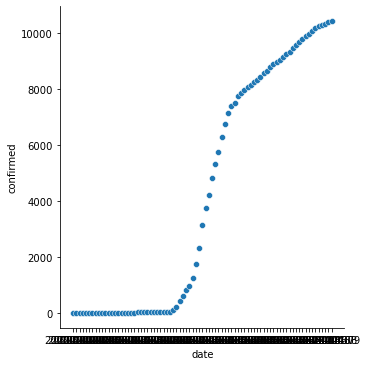

In [9]:
sns.relplot(x=time['date'], y=time['confirmed'], data=time)

<Figure size 1440x432 with 0 Axes>

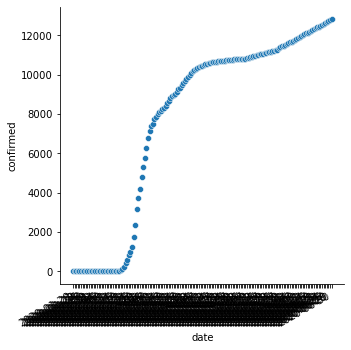

In [30]:
plt.figure(figsize=(20, 6))
a = sns.relplot(x=time['date'], y=time['confirmed'], data=time)
a.fig.autofmt_xdate()

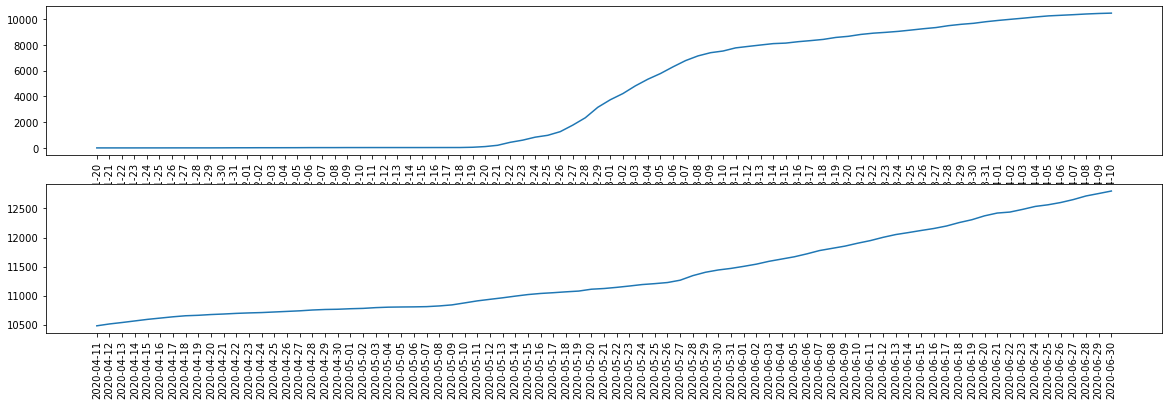

In [5]:
plt.figure(figsize=(20, 6))

plt.subplot(211)
plt.xticks(rotation=90)
plt.plot(time['date'][:82], time['confirmed'][:82])

plt.subplot(212)
plt.xticks(rotation=90)
plt.plot(time['date'][82:], time['confirmed'][82:])

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)